### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/nataliawijaya/Documents/Bootcamp/New York Citi Bikes/02 Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'citibike_cleaned_exc2930_1.csv'), index_col = False)

In [5]:
df

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46668,46668,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,...,21,2013,9,38,21,20,Weekend,Peak hours,14.1,7
46669,46669,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,...,14,2013,9,37,14,17,Weekend,Peak hours,14.0,7
46670,46670,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7
46671,46671,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,...,7,2013,9,36,7,14,Weekend,Normal hours,13.7,7


In [6]:
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,7,2013,9,36,7,18,Weekend,Peak hours,14.1,7


In [8]:
df.shape

(46673, 32)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46673 entries, 0 to 46672
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bike_id                      46673 non-null  int64  
 1   weekday                      46673 non-null  object 
 2   start_hour                   46673 non-null  int64  
 3   start_time                   46673 non-null  object 
 4   start_station_id             46673 non-null  int64  
 5   start_station_name           46673 non-null  object 
 6   start_station_latitude       46673 non-null  float64
 7   start_station_longitude      46673 non-null  float64
 8   end_time                     46673 non-null  object 
 9   end_station_id               46673 non-null  int64  
 10  end_station_name             46673 non-null  object 
 11  end_station_latitude         46673 non-null  float64
 12  end_station_longitude        46673 non-null  float64
 13  trip_duration   

In [10]:
df.describe()

,bike_id,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,...,start_month,start_week,start_day,end_year,end_month,end_week,end_day,end_hour,avg_trip_duration_each_hour,day_of_week
count,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000,40191.000000,...,46673.0,46673.000000,46673.000000,46673.0,46673.0,46673.000000,46673.000000,46673.000000,46673.000000,46673.000000
mean,17611.710454,14.152722,442.692049,40.734262,-73.991118,442.403252,40.733940,-73.991364,838.269449,1975.608470,...,9.0,37.436719,15.029010,2013.0,9.0,37.437041,15.032867,14.313757,13.466152,4.100893
std,1674.680560,4.868148,355.257605,0.019883,0.012549,355.227714,0.019858,0.012552,572.795827,11.085518,...,0.0,1.152806,7.931816,0.0,0.0,1.152415,7.931520,4.918672,0.920047,1.948041
min,14556.000000,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1899.000000,...,9.0,35.000000,1.000000,2013.0,9.0,35.000000,1.000000,0.000000,10.200000,1.000000
25%,16188.000000,10.000000,304.000000,40.720434,-74.000271,304.000000,40.720196,-74.001547,418.000000,1968.000000,...,9.0,36.000000,8.000000,2013.0,9.0,36.000000,8.000000,11.000000,12.900000,2.000000
50%,17579.000000,15.000000,402.000000,40.736197,-73.990765,402.000000,40.735354,-73.991218,672.000000,1978.000000,...,9.0,37.000000,15.000000,2013.0,9.0,37.000000,15.000000,15.000000,13.500000,4.000000
75%,19014.000000,18.000000,484.000000,40.750073,-73.981923,483.000000,40.749156,-73.982050,1110.000000,1984.000000,...,9.0,38.000000,22.000000,2013.0,9.0,38.000000,22.000000,18.000000,14.100000,6.000000
max,20642.000000,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,...,9.0,39.000000,28.000000,2013.0,9.0,39.000000,29.000000,23.000000,14.700000,7.000000


In [11]:
# Check null values
df.isnull().sum()

bike_id                           0
weekday                           0
start_hour                        0
start_time                        0
start_station_id                  0
start_station_name                0
start_station_latitude            0
start_station_longitude           0
end_time                          0
end_station_id                    0
end_station_name                  0
end_station_latitude              0
end_station_longitude             0
trip_duration                     0
subscriber                        0
birth_year                     6482
gender                            0
gender_category                   0
trip_duration_min                 0
start_year                        0
start_month                       0
start_week                        0
start_day                         0
end_year                          0
end_month                         0
end_week                          0
end_day                           0
end_hour                    

#### Check birth_year

In [12]:
df['birth_year'].describe()

count    40191.000000
mean      1975.608470
std         11.085518
min       1899.000000
25%       1968.000000
50%       1978.000000
75%       1984.000000
max       1997.000000
Name: birth_year, dtype: float64

In [13]:
df['birth_year'].value_counts(dropna = False)

birth_year
NaN       6482
1981.0    1725
1985.0    1712
1982.0    1686
1984.0    1683
          ... 
1929.0       1
1917.0       1
1926.0       1
1924.0       1
1921.0       1
Name: count, Length: 77, dtype: int64

#### Observation
- NaN values from users who did not input their birth data
- In the previous exercise I left this NaN out because it could be an indication for new users
- In this exercise I will create a new df by excluding these NaN values in birth_year

/var/folders/kj/ff_yw10j6_zbkk839hkzgftr0000gn/T/ipykernel_56499/2788466860.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['birth_year'], bins = 50)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='birth_year', ylabel='Density'>

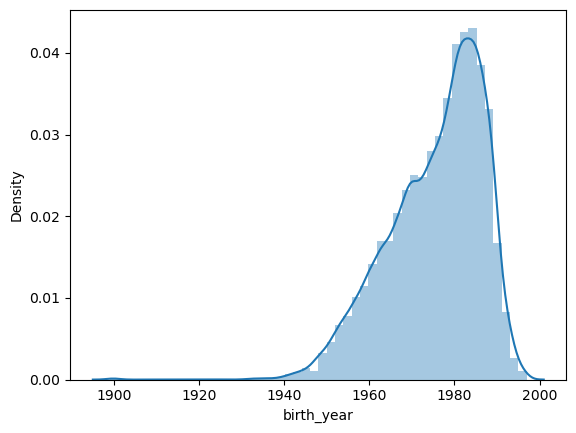

In [14]:
# Extreme value check

sns.distplot(df['birth_year'], bins = 50)

In [15]:
df_age_old = df.loc[df['birth_year'] < 1940]
df_age_old['birth_year'].value_counts(dropna = False)

birth_year
1935.0    13
1932.0    10
1939.0     8
1899.0     8
1900.0     7
1938.0     7
1937.0     6
1901.0     5
1922.0     3
1936.0     3
1933.0     3
1934.0     2
1917.0     1
1929.0     1
1926.0     1
1910.0     1
1924.0     1
1921.0     1
Name: count, dtype: int64

#### Observation:
I will create a new pdf excluding NaN's birth_year and birth_year under 1940

In [16]:
df_nan = df[df['birth_year'].isnull() == True]

In [17]:
df_nan['birth_year'].shape

(6482,)

In [18]:
# Creating a new dataframe excluding the missing values
# This time setting the isnull() condition to False instead of True (I want non-missing values as opposed to missing values) 

df_age_clean = df[df['birth_year'].isnull() == False]

In [19]:
df['birth_year'].shape

(46673,)

In [20]:
df_age_clean['birth_year'].shape

(40191,)

The calculation is correct!
 - 46673 - 40191 = 6482 (exactly the NaN values from birth_year)

In [21]:
# Now continue excluding the birth_year under 1940
df_age_old['birth_year'].value_counts(dropna = False)

birth_year
1935.0    13
1932.0    10
1939.0     8
1899.0     8
1900.0     7
1938.0     7
1937.0     6
1901.0     5
1922.0     3
1936.0     3
1933.0     3
1934.0     2
1917.0     1
1929.0     1
1926.0     1
1910.0     1
1924.0     1
1921.0     1
Name: count, dtype: int64

In [22]:
# Check the count
df_age_old['birth_year'].value_counts(dropna = False).sum()

81

In [23]:
df_age_clean['birth_year'].shape

(40191,)

In [24]:
df_clean = df_age_clean.loc[~df_age_clean['birth_year'].isin ([
1935.0,    
1932.0,    
1939.0,     
1899.0,     
1900.0,     
1938.0,     
1937.0,     
1901.0,     
1922.0,     
1936.0,     
1933.0,     
1934.0,     
1917.0,     
1929.0,     
1926.0,     
1910.0,     
1924.0,     
1921.0  ])]

In [25]:
df_clean.shape

(40110, 32)

The calculation is correct!
 - 40191 - 40110 = 81 (exactly the count of the birth_year under 1940)

In [26]:
df_clean['birth_year'].describe()

count    40110.000000
mean      1975.710297
std         10.840430
min       1940.000000
25%       1968.000000
50%       1978.000000
75%       1984.000000
max       1997.000000
Name: birth_year, dtype: float64

In [27]:
df_clean['birth_year'].dtype

dtype('float64')

In [28]:
df_clean['birth_year'] = df_clean['birth_year'].astype(int)

/var/folders/kj/ff_yw10j6_zbkk839hkzgftr0000gn/T/ipykernel_56499/4065121901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['birth_year'] = df_clean['birth_year'].astype(int)


In [29]:
df_clean['birth_year'].dtype

dtype('int64')

In [30]:
df_clean.isnull().sum()

bike_id                        0
weekday                        0
start_hour                     0
start_time                     0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_time                       0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
trip_duration                  0
subscriber                     0
birth_year                     0
gender                         0
gender_category                0
trip_duration_min              0
start_year                     0
start_month                    0
start_week                     0
start_day                      0
end_year                       0
end_month                      0
end_week                       0
end_day                        0
end_hour                       0
days_category                  0
peak_hours                     0
avg_trip_d

In [31]:
df_clean.dtypes

bike_id                          int64
weekday                         object
start_hour                       int64
start_time                      object
start_station_id                 int64
start_station_name              object
start_station_latitude         float64
start_station_longitude        float64
end_time                        object
end_station_id                   int64
end_station_name                object
end_station_latitude           float64
end_station_longitude          float64
trip_duration                    int64
subscriber                      object
birth_year                       int64
gender                           int64
gender_category                 object
trip_duration_min                int64
start_year                       int64
start_month                      int64
start_week                       int64
start_day                        int64
end_year                         int64
end_month                        int64
end_week                 

Select variables that seem good for analysis
- start_hour
- birth_year
- avg_trip_duration_each_hour 

#### Analysis per day

In [32]:
df_clean['weekday'].value_counts(dropna = False)

weekday
Fri    6589
Wed    6478
Tue    6414
Thu    6205
Mon    5124
Sat    4963
Sun    4337
Name: count, dtype: int64

In [33]:
# Rides per day
df_day = df_clean.groupby('weekday')['start_hour'].count()
df_day

weekday
Fri    6589
Mon    5124
Sat    4963
Sun    4337
Thu    6205
Tue    6414
Wed    6478
Name: start_hour, dtype: int64

In [34]:
# Average trip duration per day
df_avg_trip = df_clean.groupby('weekday')['trip_duration_min'].mean()
df_avg_trip

weekday
Fri    12.227804
Mon    12.256635
Sat    12.904292
Sun    13.192991
Thu    12.014504
Tue    12.003586
Wed    12.227694
Name: trip_duration_min, dtype: float64

In [35]:
# Average age per day
df_avg_age = df_clean.groupby('weekday')['birth_year'].mean()
df_avg_age

weekday
Fri    1975.500379
Mon    1975.482045
Sat    1976.978037
Sun    1976.813235
Thu    1975.175665
Tue    1975.281104
Wed    1975.331738
Name: birth_year, dtype: float64

In [36]:
# Put it together
df_result = pd.DataFrame({'day_of_week': df_day.index, 'ride_count': df_day.values, 'avg_duration': df_avg_trip.values, 'avg_age': df_avg_age.values})
df_result

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6589,12.227804,1975.500379
1,Mon,5124,12.256635,1975.482045
2,Sat,4963,12.904292,1976.978037
3,Sun,4337,13.192991,1976.813235
4,Thu,6205,12.014504,1975.175665
5,Tue,6414,12.003586,1975.281104
6,Wed,6478,12.227694,1975.331738


#### Analysis per 24 hours

In [37]:
df_clean['start_hour'].value_counts(dropna = False)

start_hour
17    4117
18    3983
8     2944
16    2817
19    2728
9     2434
15    2260
13    2238
14    2223
12    2194
7     1883
20    1800
11    1694
10    1691
21    1287
22    1100
6      843
23     765
0      391
1      244
5      179
2      138
3       87
4       70
Name: count, dtype: int64

In [38]:
# Rides per hour
df_hour = df_clean.groupby('start_hour')['start_hour'].count()
df_hour

start_hour
0      391
1      244
2      138
3       87
4       70
5      179
6      843
7     1883
8     2944
9     2434
10    1691
11    1694
12    2194
13    2238
14    2223
15    2260
16    2817
17    4117
18    3983
19    2728
20    1800
21    1287
22    1100
23     765
Name: start_hour, dtype: int64

In [39]:
# Average trip duration per hour
df_avg_trip1 = df_clean.groupby('start_hour')['trip_duration_min'].mean()
df_avg_trip1

start_hour
0     11.933504
1     11.135246
2     10.615942
3     10.954023
4     10.500000
5      9.564246
6     10.289442
7     11.587892
8     12.119226
9     11.702136
10    11.958013
11    12.184179
12    11.666363
13    11.938785
14    12.479532
15    12.650000
16    13.088747
17    13.183629
18    13.323876
19    12.550953
20    12.471667
21    12.468531
22    11.900000
23    11.677124
Name: trip_duration_min, dtype: float64

In [40]:
# Average age per hour
df_avg_age1 = df_clean.groupby('start_hour')['birth_year'].mean()
df_avg_age1

start_hour
0     1979.363171
1     1979.225410
2     1978.427536
3     1981.482759
4     1974.485714
5     1975.424581
6     1974.631079
7     1973.909187
8     1974.951427
9     1974.819638
10    1974.746895
11    1974.708973
12    1975.091613
13    1974.881144
14    1975.116509
15    1974.946018
16    1974.713880
17    1975.263541
18    1976.421542
19    1977.102273
20    1978.401667
21    1978.134421
22    1978.428182
23    1978.749020
Name: birth_year, dtype: float64

In [41]:
# Put it together
df_result1 = pd.DataFrame({'start_hour': df_hour.index, 'ride_count': df_hour.values, 'avg_duration': df_avg_trip1.values, 'avg_age': df_avg_age1.values})
df_result1

,start_hour,ride_count,avg_duration,avg_age
0,0,391,11.933504,1979.363171
1,1,244,11.135246,1979.225410
2,2,138,10.615942,1978.427536
3,3,87,10.954023,1981.482759
4,4,70,10.500000,1974.485714
5,5,179,9.564246,1975.424581
6,6,843,10.289442,1974.631079
7,7,1883,11.587892,1973.909187
8,8,2944,12.119226,1974.951427
9,9,2434,11.702136,1974.819638


Observation:
- The results seem reasonable as more young people tend to ride at night compared to old ones

### The Elbow Technique

In [42]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [43]:
score = [kmeans[i].fit(df_result1).score(df_result1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

[-32575004.859283153,
 -9473579.056005482,
 -3870805.5186748207,
 -1787791.3001294665,
 -848039.3007127657,
 -337890.28246039443,
 -186127.05801893215,
 -133307.52478861867,
 -99589.06065695983]

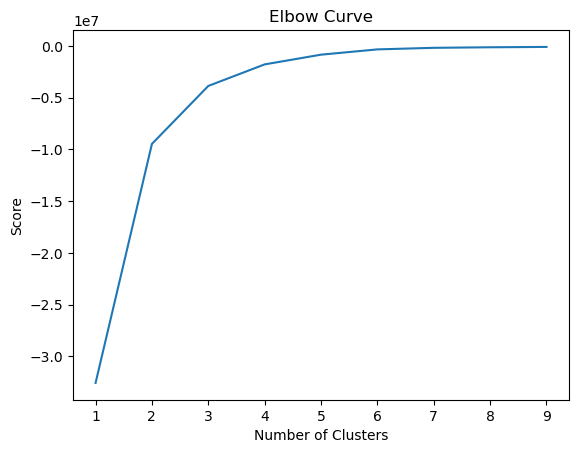

In [44]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### After 4 on the x-axis, the curve straightens out. I will take 4 as the optimal count for this clusters

### k-means clustering

In [45]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [46]:
# Fit the k-means object to the data.

kmeans.fit(df_result1)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [47]:
df_result1['clusters'] = kmeans.fit_predict(df_result1)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
df_result1.head()

,start_hour,ride_count,avg_duration,avg_age,clusters
0,0,391,11.933504,1979.363171,1
1,1,244,11.135246,1979.225410,1
2,2,138,10.615942,1978.427536,1
3,3,87,10.954023,1981.482759,1
4,4,70,10.500000,1974.485714,1


In [49]:
df_result1['clusters'].value_counts()

clusters
1    8
2    8
0    6
3    2
Name: count, dtype: int64

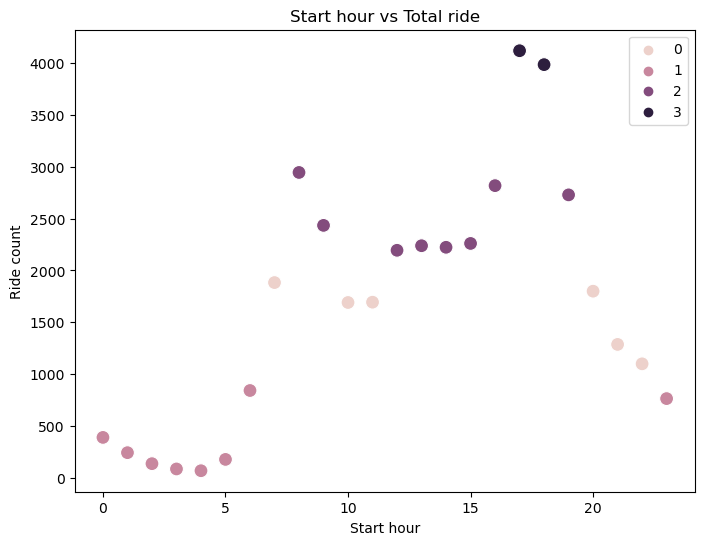

In [50]:
# Plot the clusters for the "start_hour" and "ride_count" variables.

plt.figure(figsize = (8,6))
ax = sns.scatterplot(x = df_result1['start_hour'], y = df_result1['ride_count'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('Start hour vs Total ride') 
plt.xlabel('Start hour') # Label x-axis.
plt.ylabel('Ride count') # Label y-axis.
plt.show()

#### Peak hours:
- 8am = 3095 rides count
- 16pm = 3509 rides count
- 17pm = 4736 rides count
- 18pm = 4546 rides count
- 19pm = 3084 rides count

#### Obsevation:
- Cluster 0: Is one of the most populated clusters (along with cluster 1). This cluster collects data points with a very late start time of ride around 23 pm to early morning 6 am and has the least number of ride compared to other clusters
- Cluster 1: Is one of the most populated clusters (along with cluster 0). This cluster is spread throughout the morning until the afternoon. This cluster occupies 8 am which is the only peak hour in the morning and is also spread over the peak hours in the evening. This cluster has a higher number of ride compared to other clusters (cluster 0 and cluster 2).This cluster may be filled by workers who may rent bicycles to commute to work during rush hour to and from work
- Cluster 2: This cluster only occupies the morning and evening hours. The number of ride is lower than in the previous cluster, but still higher than in cluster 0
- Cluster 3: This cluster is right at peak rush hour (which are 17pm and 18pm) and has high number of ride compared to other clusters

#### Further Analysis:
In this cluster I use 4 variables:
- start_hour	
- ride_count	
- avg_duration	
- avg_age

Since I have used start_hour and ride_count as X and Y then I think those colors might belong to 2 other variables (avg_duration and avg_age). I'm going to do a quick check of these 2 variables to see at a glance if there is any relationship to each other

In [51]:
# Check users at 17pm and 18pm (new subset)
df_peak = df_clean.loc[df['start_hour'].isin([17,18])]
df_peak.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
14,15973,Mon,18,2013-09-16 18:45:05,167,E 39 St & 3 Ave,40.748901,-73.976049,2013-09-16 18:47:59,440,...,16,2013,9,38,16,18,Weekdays,Peak hours,14.1,2
17,18846,Tue,17,2013-09-24 17:48:27,505,6 Ave & W 33 St,40.749013,-73.988484,2013-09-24 18:02:04,459,...,24,2013,9,39,24,18,Weekdays,Peak hours,14.0,3
21,15136,Mon,18,2013-09-09 18:45:24,385,E 55 St & 2 Ave,40.757973,-73.966033,2013-09-09 19:05:26,435,...,9,2013,9,37,9,19,Weekdays,Peak hours,14.1,2


In [52]:
df_peak.shape

(8100, 32)

In [53]:
# Check any posibilities (with avg duration)
df_peak['avg_trip_duration_each_hour'].describe()

count    8100.000000
mean       14.049173
std         0.049996
min        14.000000
25%        14.000000
50%        14.000000
75%        14.100000
max        14.100000
Name: avg_trip_duration_each_hour, dtype: float64

In [54]:
# Check any posibilities (with avg duration)
df_clean['avg_trip_duration_each_hour'].describe()

count    40110.000000
mean        13.419683
std          0.937933
min         10.200000
25%         12.700000
50%         13.500000
75%         14.100000
max         14.700000
Name: avg_trip_duration_each_hour, dtype: float64

#### Observation:
Rush hour has a higher average trip duration than other normal hours, and this is actually interesting because I analyzed this relationship in the previous exercise (the closer to rush hour, the higher the average trip duration). It seems they do have a relationship with each other and I will do further analysis based on your feedback at the end of this exercise

In [55]:
# Check any posibilities (with age)
df_peak['birth_year'].describe()

count    8100.000000
mean     1975.832963
std        10.638587
min      1940.000000
25%      1969.000000
50%      1978.000000
75%      1984.000000
max      1997.000000
Name: birth_year, dtype: float64

In [56]:
# Check any posibilities (with age)
df_clean['birth_year'].describe()

count    40110.000000
mean      1975.710297
std         10.840430
min       1940.000000
25%       1968.000000
50%       1978.000000
75%       1984.000000
max       1997.000000
Name: birth_year, dtype: float64

#### Observation:
Can't draw any conclusions from this since they look the same

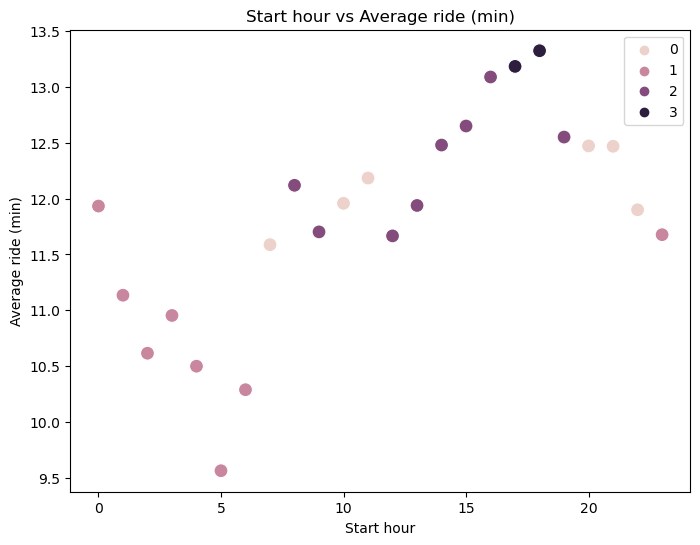

In [57]:
# Plot the clusters for the "start_hour" and "avg_duration" variables.

plt.figure(figsize = (8,6))
ax = sns.scatterplot(x = df_result1['start_hour'], y = df_result1['avg_duration'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('Start hour vs Average ride (min)') 
plt.xlabel('Start hour') # Label x-axis.
plt.ylabel('Average ride (min)') # Label y-axis.
plt.show()

#### Observation:
- This confirm my previous observation that cluster 3 that is right at peak rush hour (which are 17pm and 18pm) has higher average ride duration
- Clusters 1 and 2 appear to have almost the same average trip duration
- Cluster 0 has set my sights on further analysis. This cluster not only has the fewest number of ride (from the previous figure) but also has a shorter average ride duration and late riding start times

#### Further Analysis:
I will create a new subset containing those who start riding from 11pm to 6am

In [58]:
# Check users from 23pm till 5am (new subset)
df_least = df_clean.loc[df['start_hour'].isin([23, 0, 1, 2, 3, 4, 5, 6])]
df_least.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
10,15316,Fri,23,2013-09-06 23:02:53,251,Mott St & Prince St,40.723180,-73.994800,2013-09-06 23:23:43,460,...,6,2013,9,36,6,23,Weekdays,Normal hours,12.6,6
11,15522,Sun,2,2013-09-22 02:02:47,393,E 5 St & Avenue C,40.722992,-73.979955,2013-09-22 02:19:34,2022,...,22,2013,9,38,22,2,Weekend,Normal hours,12.2,1
15,19355,Mon,6,2013-09-23 06:54:47,404,9 Ave & W 14 St,40.740583,-74.005509,2013-09-23 07:16:13,296,...,23,2013,9,39,23,7,Weekdays,Normal hours,10.5,2
31,19177,Wed,23,2013-09-25 23:20:58,116,W 17 St & 8 Ave,40.741776,-74.001497,2013-09-25 23:30:38,477,...,25,2013,9,39,25,23,Weekdays,Normal hours,12.6,4
69,15258,Thu,0,2013-09-12 00:23:28,254,W 11 St & 6 Ave,40.735324,-73.998004,2013-09-12 00:29:27,433,...,12,2013,9,37,12,0,Weekdays,Normal hours,13.1,5


In [59]:
df_least.shape

(2717, 32)

In [60]:
# Check any posibilities (with avg duration)
df_least['avg_trip_duration_each_hour'].describe()

count    2717.000000
mean       11.829076
std         1.130597
min        10.200000
25%        10.500000
50%        12.600000
75%        12.600000
max        13.100000
Name: avg_trip_duration_each_hour, dtype: float64

In [61]:
# Check any posibilities (with avg duration)
df_clean['avg_trip_duration_each_hour'].describe()

count    40110.000000
mean        13.419683
std          0.937933
min         10.200000
25%         12.700000
50%         13.500000
75%         14.100000
max         14.700000
Name: avg_trip_duration_each_hour, dtype: float64

#### Observation:
This cluster appears to have a shorter average ride duration. I think this makes sense as they ride between 11pm to 6am which means the roads are pretty quiet at that time

In [62]:
# Check any posibilities (with avg duration)
df_least['birth_year'].describe()

count    2717.000000
mean     1977.344866
std        10.308637
min      1940.000000
25%      1970.000000
50%      1980.000000
75%      1985.000000
max      1996.000000
Name: birth_year, dtype: float64

In [63]:
# Check any posibilities (with avg duration)
df_clean['birth_year'].describe()

count    40110.000000
mean      1975.710297
std         10.840430
min       1940.000000
25%       1968.000000
50%       1978.000000
75%       1984.000000
max       1997.000000
Name: birth_year, dtype: float64

#### Observation:
This cluster seems to have a younger average age. This could lead to another conclusion that late night hours are more populated by young people and that is why the average ride duration is slightly shorter because young people tend to ride faster and because also late night hours mean less traffic jams

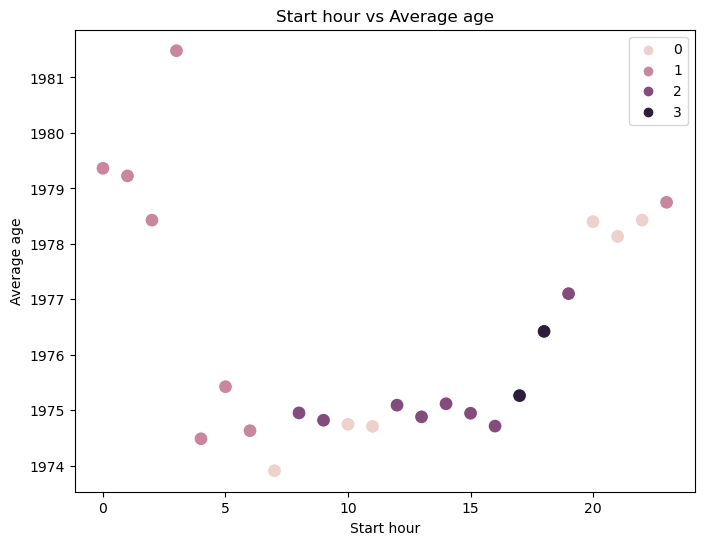

In [64]:
# Plot the clusters for the "start_hour" and "avg_age" variables.

plt.figure(figsize = (8,6))
ax = sns.scatterplot(x = df_result1['start_hour'], y = df_result1['avg_age'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('Start hour vs Average age') 
plt.xlabel('Start hour') # Label x-axis.
plt.ylabel('Average age') # Label y-axis.
plt.show()

#### Observation:
- This confirms my previous observation that cluster 0 is inhabited by more young people than other clusters
- Cluster 1 is dominated by older people compared to other clusters
- From a quick glance, I can see that the younger the age, the later they start to ride

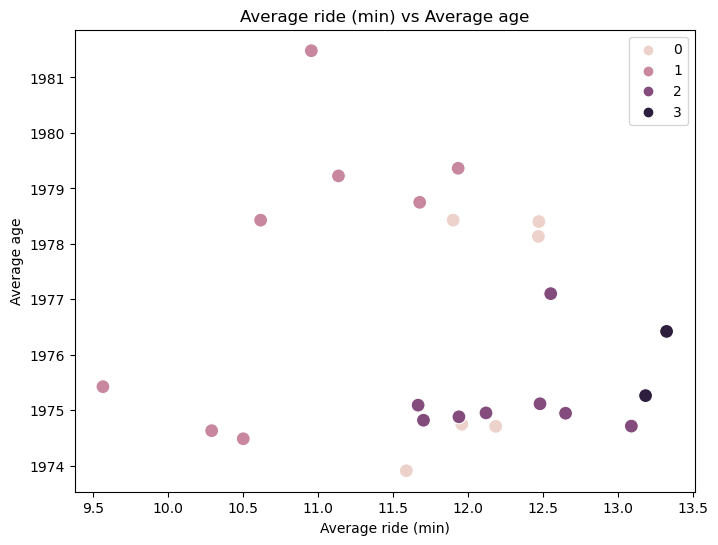

In [65]:
# Plot the clusters for the "avg_duration" and "avg_age" variables.

plt.figure(figsize = (8,6))
ax = sns.scatterplot(x = df_result1['avg_duration'], y = df_result1['avg_age'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.title('Average ride (min) vs Average age') 
plt.xlabel('Average ride (min)') # Label x-axis.
plt.ylabel('Average age') # Label y-axis.
plt.show()

#### Observation:
- This confirms my previous observation that the younger people has a shorter average ride duration
- Cluster 1 has a population of almost the same age as 1975 and this is also a cluster that is evenly distributed throughout the morning until the evening
- Cluster 3 has the highest average ride duration (this makes sense as rush hour roads tend to be busy). For me this is also interesting because this cluster not only stands right at rush hour at 17pm and 18pm, but they are also filled with more old people

### Feedback from 6.4
Quick tip regarding the "Start hour" x "Average trip duration": in the plot we can see there is some sort of relationship, it's just not linear.
One way of dealing with this would be to transform the X variable into categories:
- between 0 and 5 (a)
- between 5 and 15 (b)
- greater than 15 (c)

and have different regression models for each

#### In this case I will create a scatterplot for "Start hour" x "Average trip duration" with normal df (dataframe including those users who didn't input their birth of date)

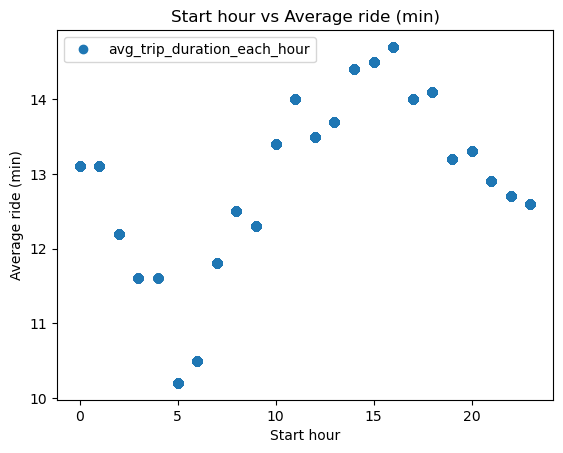

In [66]:
# Data prep for regression analysis
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'start_hour', y = 'avg_trip_duration_each_hour', style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Start hour vs Average ride (min)')  
plt.xlabel('Start hour')  
plt.ylabel('Average ride (min)')  
plt.show()

In [67]:
hours = []

for value in df['start_hour']:
    if value in [0, 1, 2, 3, 4, 5]:
        hours.append('0am - 5am')
    elif value in [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
        hours.append('6am - 15pm')
    else:
        hours.append('16pm - 23pm')

In [68]:
df['hours_category'] = hours

In [69]:
df.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week,hours_category
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,2013,9,37,9,18,Weekdays,Peak hours,14.1,2,16pm - 23pm
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,2013,9,37,12,18,Weekdays,Peak hours,14.1,5,16pm - 23pm
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,2013,9,38,18,19,Weekdays,Peak hours,13.2,4,16pm - 23pm
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,2013,9,39,28,12,Weekend,Normal hours,14.0,7,6am - 15pm
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,...,2013,9,36,7,18,Weekend,Peak hours,14.1,7,16pm - 23pm


/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


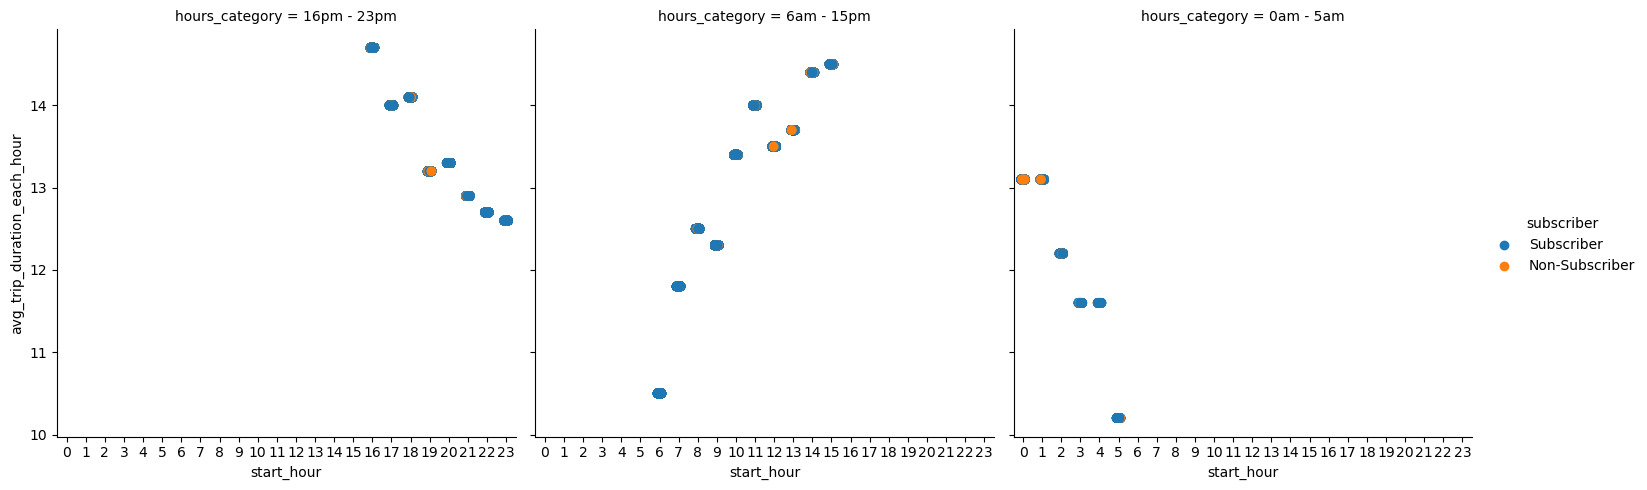

In [70]:
sns.catplot(
    data = df, x = 'start_hour',  y = 'avg_trip_duration_each_hour', col = 'hours_category', hue = 'subscriber' , aspect = 1, s = 50
)

#### Observation:
The above results are interesting because non-subscribers dominate the late hours of 0am and 1am

In [71]:
df_sub_a = df.loc[df['start_hour'].isin ([0, 1, 2, 3, 4, 5])]
df_sub_b = df.loc[df['start_hour'].isin ([6, 7, 8, 9, 10, 11, 12, 13, 14, 15])]
df_sub_c = df.loc[df['start_hour'].isin ([16, 17, 18, 19, 20, 21, 22, 23])]

In [72]:
df.shape

(46673, 33)

In [73]:
df_sub_a.shape

(1338, 33)

In [74]:
df_sub_b.shape

(23794, 33)

In [75]:
df_sub_c.shape

(21541, 33)

a + b + c

1338 + 23794 + 21541 = 46673

In [76]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### df_sub_a (between 0am and 5am)

In [77]:
# Reshape the variables into NumPy arrays and put them into separate objects
Xa = df_sub_a['start_hour'].values.reshape(-1,1)
ya = df_sub_a['avg_trip_duration_each_hour'].values.reshape(-1,1)

In [78]:
Xa

array([[2],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [79]:
ya

array([[12.2],
       [13.1],
       [13.1],
       ...,
       [13.1],
       [13.1],
       [13.1]])

In [80]:
# Split data into a training set and a test set

Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size = 0.3, random_state = 0)

In [81]:
# Regression analysis
# Create a regression object

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [82]:
# Fit the regression object onto the training set

regression.fit(Xa_train, ya_train)

LinearRegression()

In [83]:
# Predict the values of y using X

ya_predicted = regression.predict(Xa_test)

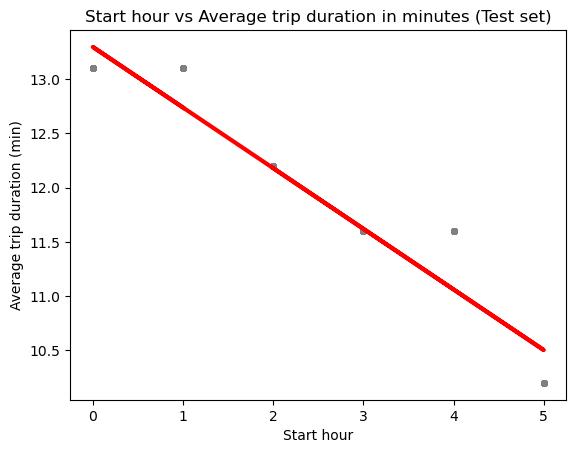

In [84]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xa_test, ya_test, color = 'gray', s = 15)
plot_test.plot(Xa_test, ya_predicted, color = 'red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Test set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

In [85]:
# Create objects that contain the model summary statistics.

rmse_a = mean_squared_error(ya_test, ya_predicted) # This is the mean squared error
r2_a = r2_score(ya_test, ya_predicted) # This is the R2 score. 

In [86]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_a)
print('R2 score: ', r2_a)

Slope: [[-0.55857097]]
Mean squared error:  0.07411012407060004
R2 score:  0.9297626773400101


In [87]:
ya_predicted

array([[12.7372448 ],
       [13.29581577],
       [12.7372448 ],
       [12.7372448 ],
       [12.7372448 ],
       [13.29581577],
       [13.29581577],
       [11.62010286],
       [12.7372448 ],
       [12.17867383],
       [10.50296093],
       [13.29581577],
       [12.7372448 ],
       [13.29581577],
       [10.50296093],
       [12.7372448 ],
       [13.29581577],
       [11.62010286],
       [13.29581577],
       [11.06153189],
       [13.29581577],
       [12.17867383],
       [13.29581577],
       [13.29581577],
       [10.50296093],
       [13.29581577],
       [12.7372448 ],
       [12.7372448 ],
       [11.62010286],
       [10.50296093],
       [10.50296093],
       [10.50296093],
       [12.17867383],
       [12.7372448 ],
       [12.7372448 ],
       [13.29581577],
       [11.06153189],
       [12.7372448 ],
       [12.7372448 ],
       [11.62010286],
       [13.29581577],
       [13.29581577],
       [13.29581577],
       [12.7372448 ],
       [10.50296093],
       [12

In [88]:
# Create a dataframe comparing the actual and predicted values of y

df_a_ap = pd.DataFrame({'Actual': ya_test.flatten(), 'Predicted': ya_predicted.flatten()})
df_a_ap.head(30)

,Actual,Predicted
0,13.1,12.737245
1,13.1,13.295816
2,13.1,12.737245
3,13.1,12.737245
4,13.1,12.737245
5,13.1,13.295816
6,13.1,13.295816
7,11.6,11.620103
8,13.1,12.737245
9,12.2,12.178674


In [89]:
# Compare how the regression fits the training set
# Predict

ya_predicted_train = regression.predict(Xa_train) # This is predicting X_train!

In [90]:
rmse_a = mean_squared_error(ya_train, ya_predicted_train)
r2_a = r2_score(ya_train, ya_predicted_train)

In [91]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_a)
print('R2 score: ', r2_a)

Slope: [[-0.55857097]]
Mean squared error:  0.0751069252654511
R2 score:  0.9306410061231679


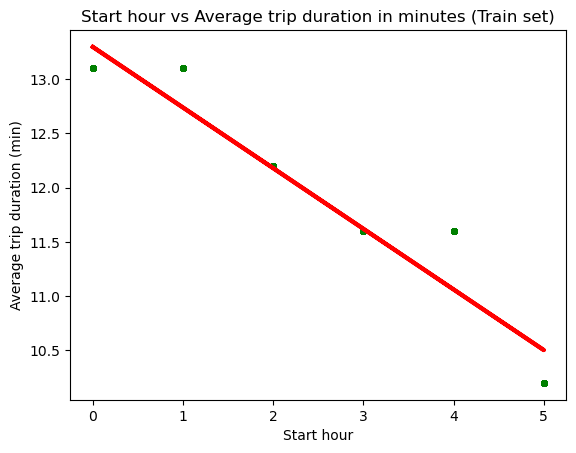

In [92]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(Xa_train, ya_train, color='green', s = 15)
plot_test.plot(Xa_train, ya_predicted_train, color='red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Train set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

#### df_sub_b (between 5am and 15pm)

In [93]:
# Reshape the variables into NumPy arrays and put them into separate objects
Xb = df_sub_b['start_hour'].values.reshape(-1,1)
yb = df_sub_b['avg_trip_duration_each_hour'].values.reshape(-1,1)

In [94]:
Xb

array([[11],
       [10],
       [12],
       ...,
       [ 8],
       [15],
       [13]])

In [95]:
yb

array([[14. ],
       [13.4],
       [13.5],
       ...,
       [12.5],
       [14.5],
       [13.7]])

In [96]:
# Split data into a training set and a test set

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size = 0.3, random_state = 0)

In [97]:
# Fit the regression object onto the training set

regression.fit(Xb_train, yb_train)

LinearRegression()

In [98]:
# Predict the values of y using X

yb_predicted = regression.predict(Xb_test)

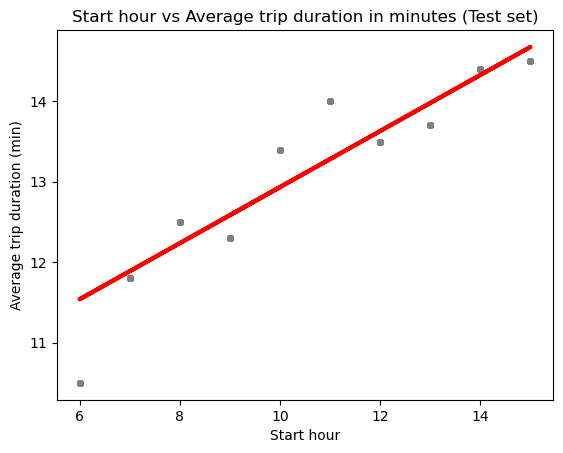

In [99]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xb_test, yb_test, color = 'gray', s = 15)
plot_test.plot(Xb_test, yb_predicted, color = 'red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Test set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

In [100]:
# Create objects that contain the model summary statistics.

rmse_b = mean_squared_error(yb_test, yb_predicted) # This is the mean squared error
r2_b = r2_score(yb_test, yb_predicted) # This is the R2 score. 

In [101]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_b)
print('R2 score: ', r2_b)

Slope: [[0.34853688]]
Mean squared error:  0.13821119773370932
R2 score:  0.8673754445802933


In [102]:
yb_predicted

array([[12.58494243],
       [13.97908995],
       [12.23640555],
       ...,
       [12.58494243],
       [12.23640555],
       [12.93347931]])

In [103]:
# Create a dataframe comparing the actual and predicted values of y

df_b_ap = pd.DataFrame({'Actual': yb_test.flatten(), 'Predicted': yb_predicted.flatten()})
df_b_ap.head(30)

,Actual,Predicted
0,12.3,12.584942
1,13.7,13.979090
2,12.5,12.236406
3,12.3,12.584942
4,13.5,13.630553
5,12.5,12.236406
6,12.5,12.236406
7,14.5,14.676164
8,14.0,13.282016
9,12.5,12.236406


In [104]:
# Compare how the regression fits the training set
# Predict

yb_predicted_train = regression.predict(Xb_train) # This is predicting X_train!

In [105]:
rmse_b = mean_squared_error(yb_train, yb_predicted_train)
r2_b = r2_score(yb_train, yb_predicted_train)

In [106]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_b)
print('R2 score: ', r2_b)

Slope: [[0.34853688]]
Mean squared error:  0.13644359976542164
R2 score:  0.8698383653285413


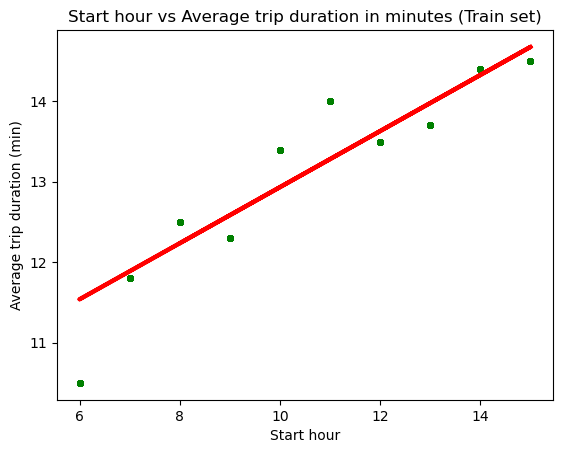

In [107]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(Xb_train, yb_train, color='green', s = 15)
plot_test.plot(Xb_train, yb_predicted_train, color='red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Train set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

#### df_sub_c (>15pm)

In [108]:
# Reshape the variables into NumPy arrays and put them into separate objects
Xc = df_sub_c['start_hour'].values.reshape(-1,1)
yc = df_sub_c['avg_trip_duration_each_hour'].values.reshape(-1,1)

In [109]:
Xc

array([[18],
       [18],
       [19],
       ...,
       [17],
       [18],
       [21]])

In [110]:
yc

array([[14.1],
       [14.1],
       [13.2],
       ...,
       [14. ],
       [14.1],
       [12.9]])

In [111]:
# Split data into a training set and a test set

Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.3, random_state = 0)

In [112]:
# Fit the regression object onto the training set

regression.fit(Xc_train, yc_train)

LinearRegression()

In [113]:
# Predict the values of y using X

yc_predicted = regression.predict(Xc_test)

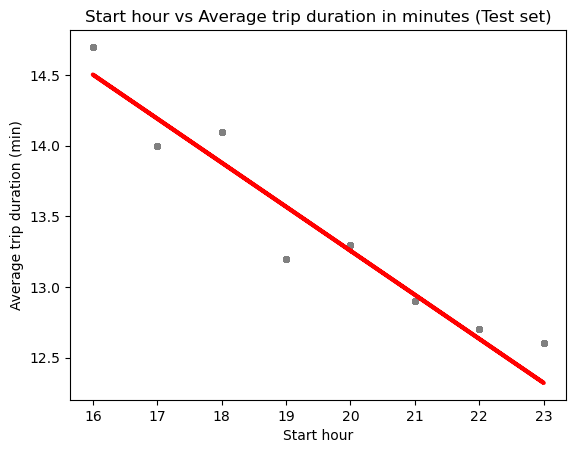

In [114]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(Xc_test, yc_test, color = 'gray', s = 15)
plot_test.plot(Xc_test, yc_predicted, color = 'red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Test set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

In [115]:
# Create objects that contain the model summary statistics.

rmse_c = mean_squared_error(yc_test, yc_predicted) # This is the mean squared error
r2_c = r2_score(yc_test, yc_predicted) # This is the R2 score. 

In [116]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_c)
print('R2 score: ', r2_c)

Slope: [[-0.31204471]]
Mean squared error:  0.04744469254299047
R2 score:  0.8856593604873697


In [117]:
yc_predicted

array([[13.25605425],
       [12.31992012],
       [13.25605425],
       ...,
       [13.88014367],
       [13.88014367],
       [13.25605425]])

In [118]:
# Create a dataframe comparing the actual and predicted values of y

df_c_ap = pd.DataFrame({'Actual': yc_test.flatten(), 'Predicted': yc_predicted.flatten()})
df_c_ap.head(30)

,Actual,Predicted
0,13.3,13.256054
1,12.6,12.319920
2,13.3,13.256054
3,14.1,13.880144
4,12.7,12.631965
5,12.7,12.631965
6,14.0,14.192188
7,12.6,12.319920
8,14.0,14.192188
9,14.7,14.504233


In [119]:
# Compare how the regression fits the training set
# Predict

yc_predicted_train = regression.predict(Xc_train) # This is predicting X_train!

In [120]:
rmse_c = mean_squared_error(yc_train, yc_predicted_train)
r2_c = r2_score(yc_train, yc_predicted_train)

In [121]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_c)
print('R2 score: ', r2_c)

Slope: [[-0.31204471]]
Mean squared error:  0.047943875058626295
R2 score:  0.8852128755361695


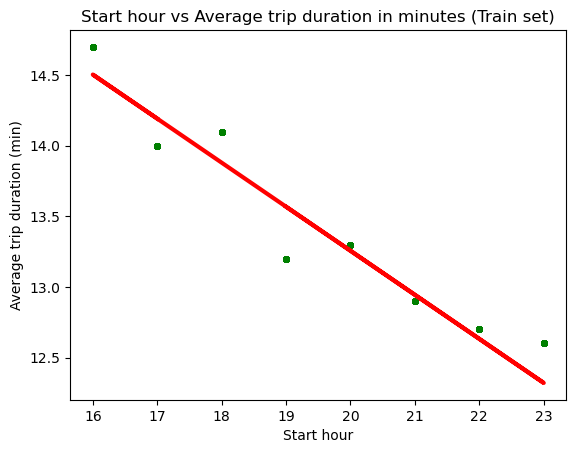

In [122]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(Xc_train, yc_train, color='green', s = 15)
plot_test.plot(Xc_train, yc_predicted_train, color='red', linewidth =3)
plot_test.title('Start hour vs Average trip duration in minutes (Train set)')
plot_test.xlabel('Start hour')
plot_test.ylabel('Average trip duration (min)')
plot_test.show()

#### Conclusion:
This actually wraps up my analysis about my hypothesis: The closer to rush hour, the higher the average trip duration.

From the cluster analysis I came to the conclusion that actually riders during peak hours have a higher average ride duration compared to other normal hours. And after dividing the time frame into 3 categories and repeating the regression, I was able to draw the conclusion that the model was actually a good fit.

Of all 3 time frames
- They produce small Mean Square Errors (MSE) on testing and training
- They produce values close to 1 for the R2 score
- Actual and predicted values appear to be good

So it is true that the two have a relationship, it's just not linear and by separating them I can see the relationship more clearly.

### Additional Analysis

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


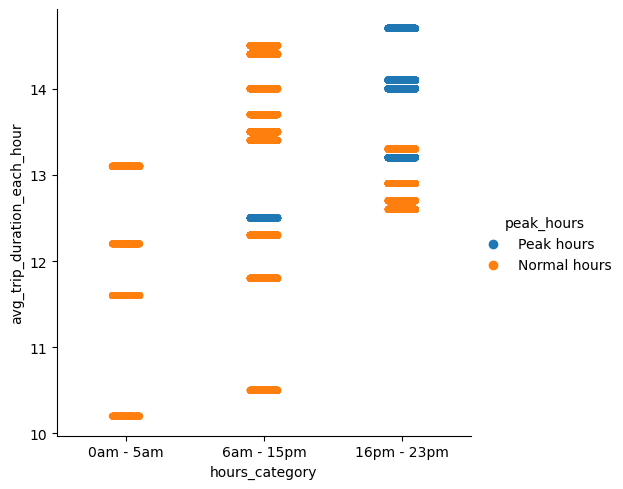

In [123]:
sns.catplot(
    data = df, x = 'hours_category',  y = 'avg_trip_duration_each_hour', hue = 'peak_hours', order = ['0am - 5am', '6am - 15pm', '16pm - 23pm']
)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


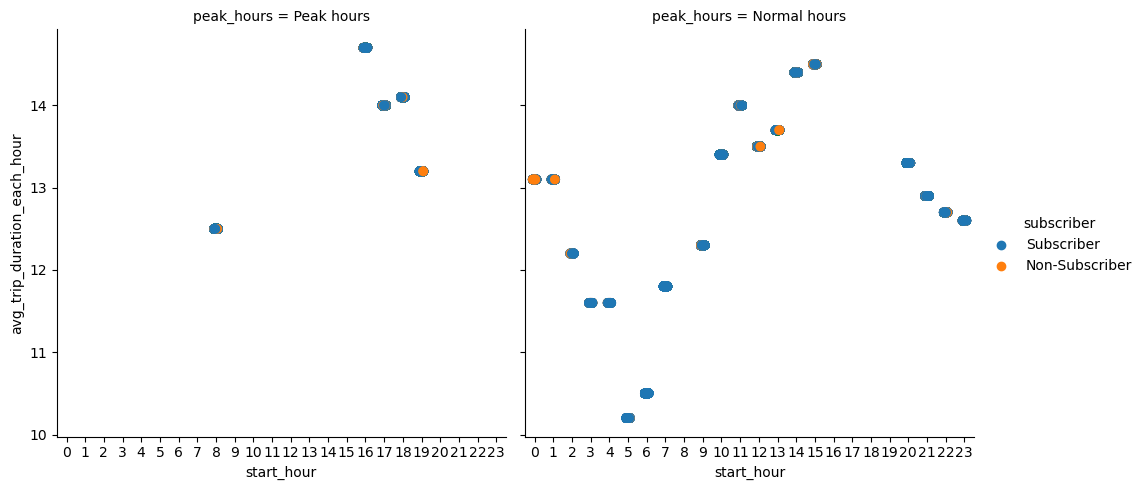

In [124]:
sns.catplot(
    data = df, x = 'start_hour',  y = 'avg_trip_duration_each_hour', col = 'peak_hours', hue = 'subscriber', aspect = 1, s = 50
)

/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nataliawijaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


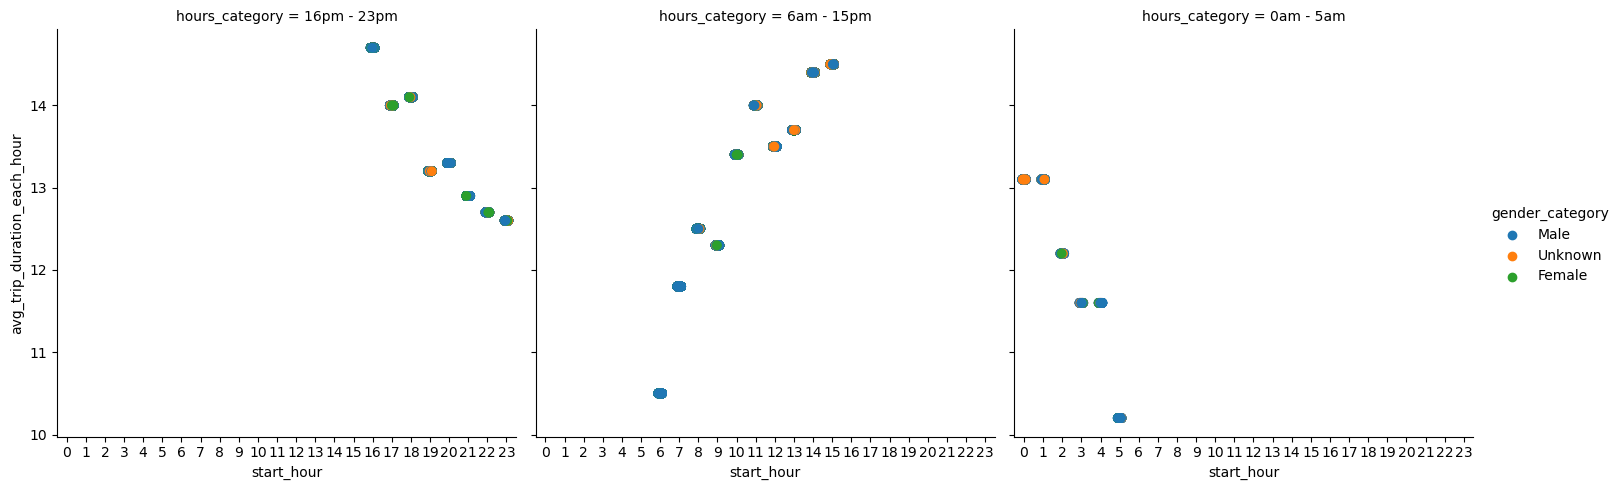

In [125]:

sns.catplot(
    data = df, x = 'start_hour',  y = 'avg_trip_duration_each_hour', hue = 'gender_category', col = 'hours_category' , aspect = 1, s = 50
)

### Exporting

In [126]:
df_clean.head()

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,...,start_day,end_year,end_month,end_week,end_day,end_hour,days_category,peak_hours,avg_trip_duration_each_hour,day_of_week
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,...,9,2013,9,37,9,18,Weekdays,Peak hours,14.1,2
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,...,12,2013,9,37,12,18,Weekdays,Peak hours,14.1,5
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,...,18,2013,9,38,18,19,Weekdays,Peak hours,13.2,4
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,...,28,2013,9,39,28,12,Weekend,Normal hours,14.0,7
5,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,...,27,2013,9,39,27,22,Weekdays,Normal hours,12.7,6


In [127]:
df_result.head()

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6589,12.227804,1975.500379
1,Mon,5124,12.256635,1975.482045
2,Sat,4963,12.904292,1976.978037
3,Sun,4337,13.192991,1976.813235
4,Thu,6205,12.014504,1975.175665


In [128]:
df_result1.head()

,start_hour,ride_count,avg_duration,avg_age,clusters
0,0,391,11.933504,1979.363171,1
1,1,244,11.135246,1979.225410,1
2,2,138,10.615942,1978.427536,1
3,3,87,10.954023,1981.482759,1
4,4,70,10.500000,1974.485714,1


In [129]:
# Exporting df_clean as “citibike_cleaned_age.csv” in “Prepared Data” folder
df_clean.to_csv(os.path.join(path, 'Prepared Data', 'citibike_cleaned_age.csv'))

In [130]:
# Exporting df_result as “citibike_result_day.csv” in “Prepared Data” folder
df_result.to_csv(os.path.join(path, 'Prepared Data', 'citibike_result_day.csv'))

In [131]:
# Exporting df_result as “citibike_result_hour.csv” in “Prepared Data” folder
df_result1.to_csv(os.path.join(path, 'Prepared Data', 'citibike_result_hour.csv'))

In [132]:
# Checking
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'citibike_result_day.csv'), index_col = False)
df.head()

,Unnamed: 0,day_of_week,ride_count,avg_duration,avg_age
0,0,Fri,6589,12.227804,1975.500379
1,1,Mon,5124,12.256635,1975.482045
2,2,Sat,4963,12.904292,1976.978037
3,3,Sun,4337,13.192991,1976.813235
4,4,Thu,6205,12.014504,1975.175665


In [133]:
# Checking
df1 = pd.read_csv(os.path.join(path, 'Prepared Data', 'citibike_result_hour.csv'), index_col = False)
df1.head()

,Unnamed: 0,start_hour,ride_count,avg_duration,avg_age,clusters
0,0,0,391,11.933504,1979.363171,1
1,1,1,244,11.135246,1979.225410,1
2,2,2,138,10.615942,1978.427536,1
3,3,3,87,10.954023,1981.482759,1
4,4,4,70,10.500000,1974.485714,1


In [134]:
df_sub_a.to_csv(os.path.join(path, 'Prepared Data', 'citibike_sub_a.csv'))
df_sub_b.to_csv(os.path.join(path, 'Prepared Data', 'citibike_sub_b.csv'))
df_sub_c.to_csv(os.path.join(path, 'Prepared Data', 'citibike_sub_c.csv'))